# Basics of Coding

Working with data and digital tools is key to enhance any commercial process and unblock value. This is why there are substantial advantages in knowing the basics of what data analysts and software engineers work on, and in particular the "algorithmic logic" they rely on.

At a high level, the key to coding - and the methods that power nearly every digital tool you can think of - holds in three distinct concepts:
<ul>
    <li><b>Abstract Data</b>, by working with representations of that data that can be manipulated - regardless of the data this representation refers to;</li>
    <li><b>Design Rules for Data</b>, by using conditions and alternatives, to decide what needs to be done or if an action needs to be taken; and</li>
    <li><b>Work over Large Amounts of Data</b>, by using "loops" that will operate on data points one after the other.</li>
    </ul>

By combining these three approaches, much can be done with data: for instance, one can loop over a record of employees to check, name by name (represented by the same data name), if that employee is named in a second record, and increment a counter if yes. 

A fourth insight, <b>Approach Data as Maths</b>, is key to machine learning applications, which we will investigate later.

## Abstract Data - Variables and Types

Data is abstracted by using "variables" or "objects" that will represent this data. These variables come with methods (i.e., ways to manipulate the data), and attributes (i.e., data points). Most coding languages also include functions, which take an input as "arguments", either to manipulate this input (e.g., change a file's name) or obtain an output. For instance, the function <code>print(x)</code> will print whatever the variable <code>x</code> represents.

In [114]:
# Data can be numerical

a = 2  # Now a represents the (numeric) data 1
b = 4
print(a + b)
print(a * b)

6
8


An important feature of coding is that it is mechanistic/deterministic. The same input, put through the same operation, will always result in the same output. An algorithm cannot divine or predict what you want - it can only implement the operation you asked it to perform. 

In [116]:
# Data can also be text, what Python calls a "string"

c = "Hello"
d = "World!"
print(c + d) # Note that the code is deterministic: if you forgot to include a space, none will print
print(c + " " + d)

HelloWorld!
Hello World!


This deterministic character is key to the power of coding: a code that works on one dataset will work on all datasets, <i>to the extent the structure remains the same</i>.

In [126]:
# A key data type in Python are lists, which include other data - including other lists for
# for example, a list could represent a shopping cart, with item, and prices (full + VAT rate)

cart = ["David", "Franprix", ["Cheese", "Saucisson"], [50, 0.2]]
print("Client's name is: ", cart[0])  
# List can be indexed to obtain the element at position x; in Python, the index start at 0
print("Store is: ", cart[1])
print("Full bill details are: ", cart[-1])
# Relative indexing allows you to index starting from the end of the list
print("VAT rate is ", cart[-1][-1]) # Since the last element in list l is another list, 
# it can be indexed as well

Client's name is:  David
Store is:  Franprix
Full bill details are:  [50, 0.2]
VAT rate is  0.2


In the case above, as long as the data respects the same structure - i.e., 4 data points, including two sublists of two data points - the accompanying code will always work and always be able to extract the data we are interested in.

## Design Rules for Data: Conditions

Conditions take the intuitive form of "if x, then do y", and "if not x, then do z". Every "if" statement requires what follows to be True, for the indented part of the code to perform.

In [148]:
cart = ["David", "Carrefair", ["Cheeses", 54]]
affiliated_stores = ["Monoprax", "SuperV", "Freinprix"]

if cart[-1][-1] >= 30:  # The == sign checks if two data points are equal; >= checks if higher
    print("Total Bill is too high")
else:
    print("Nope")
if cart[1] in affiliated_stores: 
    print("Store is affiliated")
else:
    print("Nope")

Total Bill is too high
Nope


## Work over Large Amounts of Data - Loops

Working over several data points requires to work on each data point one by one. Loops do this, and in so doing allow one to abstract away from the exact data point. For instance, you can loop over all file names in a folder without knowing what these file names are.

In [77]:
newlist = [1, 2, 3, 4, 5, 6]
for x in newlist:  # The variable "x" will now represent each data point, one by one
    print("The number now is,", x, "and its square is :", x * x)

The number now is, 1 and its square is : 1
The number now is, 2 and its square is : 4
The number now is, 3 and its square is : 9
The number now is, 4 and its square is : 16
The number now is, 5 and its square is : 25
The number now is, 6 and its square is : 36


In [130]:
import time # A function to slow down a Python command
origin = "Perlinpinpin"

reconstruct = "" # an empty string
for x in origin:  # We can loop over strings, character by character
    print("We add the letter", x, "to the word", reconstruct)
    reconstruct = reconstruct + x
    time.sleep(1) # We wait one second
print("When the loop has finished, the word is:", reconstruct)

We add the letter P to the word 
We add the letter e to the word P
We add the letter r to the word Pe
We add the letter l to the word Per
We add the letter i to the word Perl
We add the letter n to the word Perli
We add the letter p to the word Perlin
We add the letter i to the word Perlinp
We add the letter n to the word Perlinpi
We add the letter p to the word Perlinpin
We add the letter i to the word Perlinpinp
We add the letter n to the word Perlinpinpi
When the loop has finished, the word is: Perlinpinpin


## Putting it all together

The real power of coding arises when we put all these approaches (abstracting date; creating rules; working in loops) together.

For instance, below is a simple algorithm to determine how much shoppers can be reimbursed depending on the items they and places they buy stuff from - for instance, food vouchers.

In [159]:
shopping_basket = [["Damien", "Monoprax", [["Cheese", 4, 0.2], ["Beers", 12, 0.1]]],
["David", "Carrefair", [["Cheese", 4, 0.2], ["Saucisson", 15, 0.2]]],
["Alice", "SuperV", [["Potatoes", 4, 0.2], ["Beef", 12, 0.2], ["Tomatoes", 31, 0.2]]]]
# This list of list represents several shopping baskets, with

affiliated_stores = ["Monoprax", "SuperV", "Freinprix"]
authorised_items = ["Cheese", "Saucisson", "Potatoes", "Beef"]

for cart in shopping_basket:
    total = 0  # We initialise the total bill
    if cart[1] in affiliated_stores:  # First verify the sale took place in a partner store
        for item in cart[2]:
            if item[0] in authorised_items:
                total = total + item[1] + (item[1] * item[2])
        if total > 0 and total <= 25:
            print("Client", cart[0], ": your voucher has paid", total, " euros")
        if total > 25:
            print("Client", cart[0], ": your voucher has paid the limit of 25 euros, you still have", total - 25, "to pay")
    else:
        print("Client", cart[0], ": you cannot shop in this store.")

Client Damien : your voucher has paid 4.8  euros
Client David : you cannot shop in this store.
Client Alice : your voucher has paid 19.200000000000003  euros


# Data Analysis - Employees Dataset

## Load the Data

Data is usually contained in databases, which can most often be represented as a spreadsheet with rows and columns. Python has a data type - called a "dataframe" that represents such spreadsheets and allow to operate over it.

In [107]:
import pandas as pd  # Functions and data types beyond the basics need to be imported in Python to work in a given script
import matplotlib.pyplot as plt  # These three lines import modules useful for plotting
%matplotlib inline
import seaborn as sns
import numpy as np

df = pd.read_csv("../Data/Employees.csv", header="infer", encoding="utf8")
print(df.columns)  # We first have a look at what are the columns
print("_______")
print(df.head(15)) # Then we look at the first 15 rows

Index(['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService',
       'AbsentHours', 'BusinessUnit'],
      dtype='object')
_______
    EmployeeNumber    Surname GivenName Gender             City  \
0                1  Gutierrez     Molly      F          Burnaby   
1                2   Hardwick   Stephen      M        Courtenay   
2                3    Delgado   Chester      M         Richmond   
3                4      Simon     Irene      F         Victoria   
4                5   Delvalle    Edward      M  New Westminster   
5                6      Jones     Ernie      M         Richmond   
6                7     Buford     Ralph      M        Vancouver   
7                8        Lee   Gregory      M          Sechelt   
8                9      Smith     Jerry      M  New Westminster   
9               10      Beard    Robert      M        Vancouver   
10              11     Mathis      Jo

Working with dataframes is very powerful in terms of extracting data and conducting exploratory/descriptive analyses. For instance, one comand is enough to obtain the number of employees per gender; or to obtain a graph that maps the employees' age.

M    4216
F    4120
Name: Gender, dtype: int64


array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

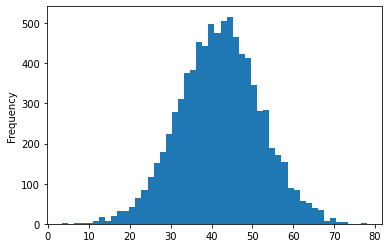

In [108]:
print(df.Gender.value_counts())  # The method value_counts() simply count how many lines correspond to what value
# Here, we see that there are a nearly equal number of males and females in this dataset

df["Age"].plot(kind='hist', subplots=True, bins=50)  # The method plot() creates graphs, here of the age of the employees
# The arguments (between brackets) allow to customise the plot

## Extract the Data

The real power of a dataframe lies in its ability to mix several data points to extract further insights. For instance, if we wanted to check the average of AbsentHours by Gender, this is again a single line of command.

In [36]:
print(df.groupby("Gender").AbsentHours.mean())  # The result indicates that Females have on average more Absenteeism
print("_______")
print(df.groupby("Gender").LengthService.median()) # Their average length of service is however similar

Gender
F    66.688349
M    56.002666
Name: AbsentHours, dtype: float64
_______
Gender
F    4.592879
M    4.617564
Name: LengthService, dtype: float64


These data points can later easily be synthetised, and plotted.

In [57]:
print(df.DepartmentName.value_counts().keys())  
# Too many department types: let's reassign the least frequent ones to "Other"
most_frequent = ["Customer Service", "Dairy", "Meats", "Bakery", "Produce", "Processed Foods"]
df["DepartmentName"] = df["DepartmentName"].apply(lambda x: "Other" if x not in most_frequent else x)
print("_________")
print(df.DepartmentName.value_counts())  # It has now been synthetised

Index(['Customer Service', 'Dairy', 'Meats', 'Bakery', 'Produce',
       'Processed Foods', 'Other'],
      dtype='object')
_________
Customer Service    1737
Dairy               1515
Meats               1514
Bakery              1449
Produce             1163
Processed Foods      746
Other                212
Name: DepartmentName, dtype: int64


<AxesSubplot:xlabel='Division', ylabel='AbsentHours'>

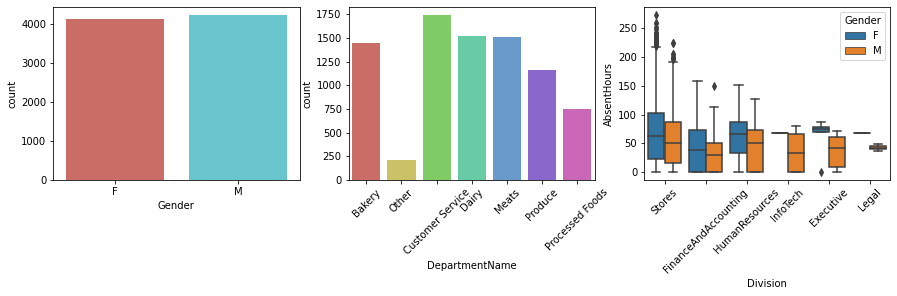

In [58]:
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
sns.countplot(x='Gender', data = df, palette='hls')
plt.subplot(2,3,2)
plt.xticks(rotation = 45)
sns.countplot(x='DepartmentName', data = df, palette='hls')
plt.subplot(2,3,3)
plt.xticks(rotation = 45)
sns.boxplot(x="Division", y="AbsentHours", hue="Gender", data=df)

The analysis can go a bit further and check, for instance, the association between several variables. Python dataframes can quickly calculate a linear regression over two measures to see if they are correlated. These regressions can then be put in a graph (a heatmap) for better visualisation. 

The results below indicate a small correlation between "Age" and "LengthService" (which could be expected), but also a clear and strong relationship between "Age" and "AbsentHours".

                EmployeeNumber       Age  LengthService  AbsentHours
EmployeeNumber        1.000000 -0.018445      -0.119631     0.007418
Age                  -0.018445  1.000000       0.053104     0.830234
LengthService        -0.119631  0.053104       1.000000    -0.044202
AbsentHours           0.007418  0.830234      -0.044202     1.000000


<AxesSubplot:>

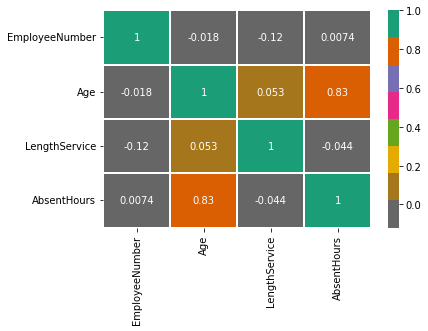

In [27]:
print(df.corr()) # The .corr() method returns the correlation between a dataframe's numerical values

sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)  # We can pass these correlations to create a heatmap

# Data Analysis - Marketing Dataset


We can easily reproduce what we did with a second dataset, focused on a marketing campaign. Likewise, we start by loading and briefly exploring the data.

In [80]:
df = pd.read_csv("../Data/Marketing.csv", header="infer", encoding="utf8")
print(df.columns)  # We first have a look at what are the columns
print("_______")
print(df.head(15)) # Then we look at the first 15 rows

Index(['Age', 'Job', 'Marital', 'Education', 'Housing', 'Loan', 'Contact',
       'Duration', 'Success'],
      dtype='object')
_______
    Age          Job   Marital            Education Housing Loan    Contact  \
0    56     services   married          high.school      no  yes  telephone   
1    45     services   married             basic.9y      no   no  telephone   
2    59       admin.   married  professional.course      no   no  telephone   
3    41  blue-collar   married              unknown      no   no  telephone   
4    24   technician    single  professional.course     yes   no  telephone   
5    25     services    single          high.school     yes   no  telephone   
6    41  blue-collar   married              unknown      no   no  telephone   
7    25     services    single          high.school     yes   no  telephone   
8    29  blue-collar    single          high.school      no  yes  telephone   
9    57    housemaid  divorced             basic.4y     yes   no  telephon

<AxesSubplot:xlabel='Marital', ylabel='Duration'>

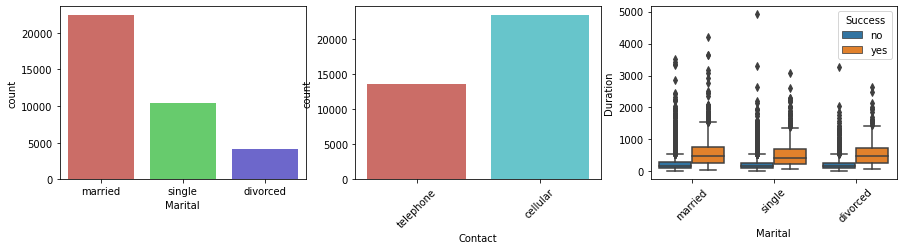

In [81]:
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
sns.countplot(x='Marital', data = df, palette='hls')
plt.subplot(2,3,2)
plt.xticks(rotation = 45)
sns.countplot(x='Contact', data = df, palette='hls')
plt.subplot(2,3,3)
plt.xticks(rotation = 45)
sns.boxplot(x="Marital", y="Duration", hue="Success", data=df)

# Machine Learning Application


## Example - Customers Churn

The data below is extracted from a (real) dataset of customers churns for a North American telecoms company. The main variables to consider here are <code>MonthlyCharges</code> (average cost of the service per customer) and <code>Tenure</code> (how long they remained a customer before churning).

In [141]:
df = pd.read_csv("../Data/TelCo.csv", header="infer", encoding="utf8")
# We load the data and explore the columns
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

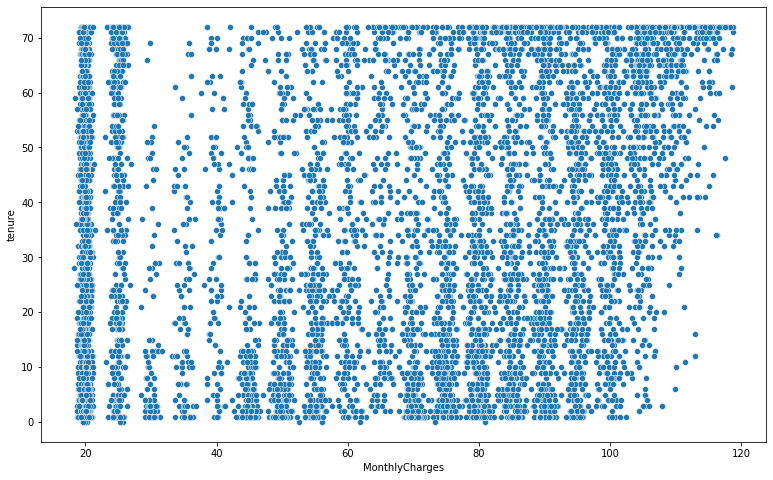

In [71]:
# And then we plot the distribution between MonthlyCharges and Tenure
# This indicates that the dataset includes all types of customers, no obvious groupings
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(x='MonthlyCharges',y="tenure", data = df, palette='hls')

In [110]:
import sklearn
sklearn.__version__

'1.0.2'

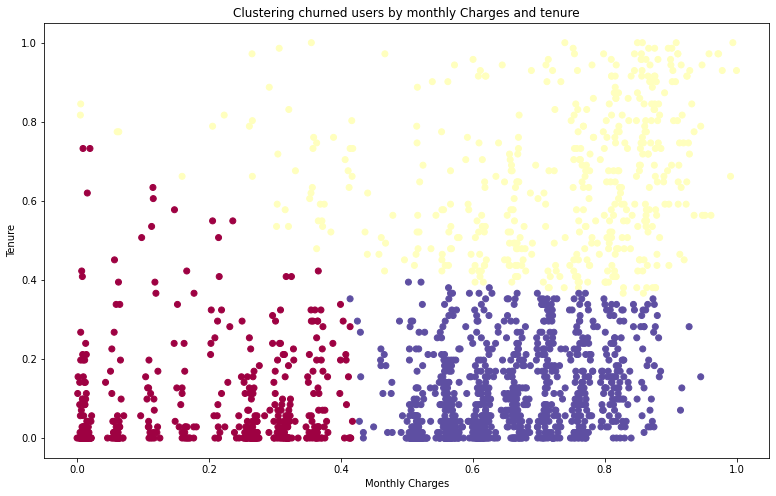

In [142]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

monthlyp_and_tenure = df[['MonthlyCharges','tenure']][df.Churn == 'Yes']

scaler = MinMaxScaler()
monthly_and_tenure_standardized = pd.DataFrame( scaler.fit_transform(monthlyp_and_tenure) )
monthly_and_tenure_standardized.columns = ['MonthlyCharges','tenure']

kmeans = KMeans(n_clusters = 3, random_state = 42).fit(monthly_and_tenure_standardized)

monthly_and_tenure_standardized['cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(13,8))
plt.scatter( monthly_and_tenure_standardized['MonthlyCharges'], monthly_and_tenure_standardized['tenure'],
           c = monthly_and_tenure_standardized['cluster'], cmap = 'Spectral')

plt.title('Clustering churned users by monthly Charges and tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')


plt.show()

A machine learning analysis, however, based on the k-means algorithms, allows to identify three groups of churned users: 
<ul><li>Customers who paid little and left quickly, and for whom the strategy will be in terms of conversion, start-up commitment (i.e., 12-month contracts), and conversion rate;</li>
    <li>Customers who paid a lot but did not stay long enough, and for whom the strategy will involve adjusting pricing to their needs; and</li>
    <li>Customers who stayed long and paid a lot, and for whom it will be necessary to identify sources of dissatisfactions and break-up rates.
    </li></ul>